# Analysing UK Railway
## About this Project
As a Data Analyst for National Rail, my role involves developing an exploratory dashboard that provides key insights into the company’s operations. This project is designed to help identify trends and patterns in ticket sales, travel behaviour, revenue generation, and operational performance. By leveraging this dashboard, managers will be empowered to make data-driven decisions aimed at improving customer satisfaction, enhancing service reliability, and driving overall business success.

## Scope
The dashboard will cover the following key areas:

1.	**Popular Routes:** Identify routes with the highest ticket sales, helping to understand passenger preferences and optimize route planning.
2.  **Revenue Analysis:** Analyse revenue from various ticket types and classes, providing insights into financial performance and opportunities for revenue enhancement.
3.  **Performance**: Evaluate train punctuality and identify factors contributing to delays or cancellations, with the goal of improving operational reliability and customer satisfaction.
4.	**Peak Travel Times:** Determine times with the highest passenger volumes to ensure efficient resource allocation and improved passenger experience.

## Key Deliverables
1.	Interactive Dashboard: A user-friendly dashboard built using Jupyter Notebook, incorporating visualisations and analytics to provide actionable insights.
2.	Data Insights Report: A comprehensive report summarising key findings, trends, and recommendations based on the data analysis.

## Load Data

Load the railway CSV file into a pandas DataFrame for analysis.

In [1]:
%pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv("railway.csv")

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,None,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,None,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,None,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No


## Clean the Data

- We are correcting spellings and updating station names to reflect the proper names.
- We then append station codes and coordinate columns with their corresponding arrival/departure stations.
- We check for any missing "actual arrival times" and add a mean value for the relevant route.

In [5]:
# Remove "London" from the station names in both 'Departure Station' and 'Arrival Destination' columns
df['Departure Station'] = df['Departure Station'].str.replace('London ', '', regex=False)
# Replace "Kings" with "King's" in the station name as it's incorrect spelling
df['Departure Station'] = df['Departure Station'].str.replace('Kings ', "King's ", regex=False)
# Replace "Swindon" with "Swindon (Wilts)" as this is the correct station name
df['Departure Station'] = df['Departure Station'].str.replace('Swindon', "Swindon (Wilts)", regex=False)
# Replace "Didcot" with "Didcot Parkway" as this is the correct station name
df['Departure Station'] = df['Departure Station'].str.replace('Didcot', "Didcot Parkway", regex=False)
# Replace "Edinburgh Waverley" with "Didcot Parkway" as this is the correct station name
df['Departure Station'] = df['Departure Station'].str.replace('Edinburgh Waverley', "Edinburgh", regex=False)
# Replace "Edinburgh Waverley" with "Didcot Parkway" as this is the correct station name
df['Departure Station'] = df['Departure Station'].str.replace('Wakefield', "Wakefield Westgate", regex=False)
df['Arrival Destination'] = df['Arrival Destination'].str.replace('London ', '', regex=False)
df['Arrival Destination'] = df['Arrival Destination'].str.replace('Kings ', "King's ", regex=False)
df['Arrival Destination'] = df['Arrival Destination'].str.replace('Swindon', "Swindon (Wilts)", regex=False)
df['Arrival Destination'] = df['Arrival Destination'].str.replace('Didcot', "Didcot Parkway", regex=False)
df['Arrival Destination'] = df['Arrival Destination'].str.replace('Edinburgh Waverley', "Edinburgh", regex=False)
df['Arrival Destination'] = df['Arrival Destination'].str.replace('Wakefield', "Wakefield Westgate", regex=False)

# Save the cleaned DataFrame back to a CSV file
df.to_csv('updated_railway.csv', index=False)

In [6]:
# Now that the stations are renamed we will load in the station code names and add columns to show these.

# Load the datasets
railway_df = df
stations_df = pd.read_csv('stations.csv')

# Merge to get the Departure TLC, Latitude, and Longitude
railway_df = railway_df.merge(stations_df[['Station', 'TLC', 'Latitude', 'Longitude']], 
                              left_on='Departure Station', right_on='Station', how='left')
railway_df.rename(columns={'TLC': 'Departure TLC', 'Latitude': 'Departure Latitude', 'Longitude': 'Departure Longitude'}, inplace=True)
railway_df.drop(columns=['Station'], inplace=True)

# Merge to get the Arrival TLC, Latitude, and Longitude
railway_df = railway_df.merge(stations_df[['Station', 'TLC', 'Latitude', 'Longitude']], 
                              left_on='Arrival Destination', right_on='Station', how='left')
railway_df.rename(columns={'TLC': 'Arrival TLC', 'Latitude': 'Arrival Latitude', 'Longitude': 'Arrival Longitude'}, inplace=True)
railway_df.drop(columns=['Station'], inplace=True)

# Save the updated DataFrame back to a CSV file
railway_df.to_csv('updated_railway.csv', index=False)

# Override the original data
df = railway_df

In [7]:
# Convert 'Actual Arrival Time' to datetime objects
df['Actual Arrival Time'] = pd.to_datetime(df['Actual Arrival Time'], format='%H:%M:%S', errors='coerce')

# Calculate the median 'Actual Arrival Time' for each route
median_actual_arrival_time = df.groupby(['Departure TLC', 'Arrival TLC'])['Actual Arrival Time'].transform('median')

# Fill NaN values in 'Actual Arrival Time' with the median values for the relevant route
df['Actual Arrival Time'] = df['Actual Arrival Time'].fillna(median_actual_arrival_time)

# Format the 'Actual Arrival Time' column to display only the time portion
df['Actual Arrival Time'] = df['Actual Arrival Time'].dt.strftime('%H:%M:%S')

# Save the updated DataFrame back to a CSV file
df.to_csv('updated_railway.csv', index=False)

## Data Analysis

### Popular Routes (by departure and arrival stations)

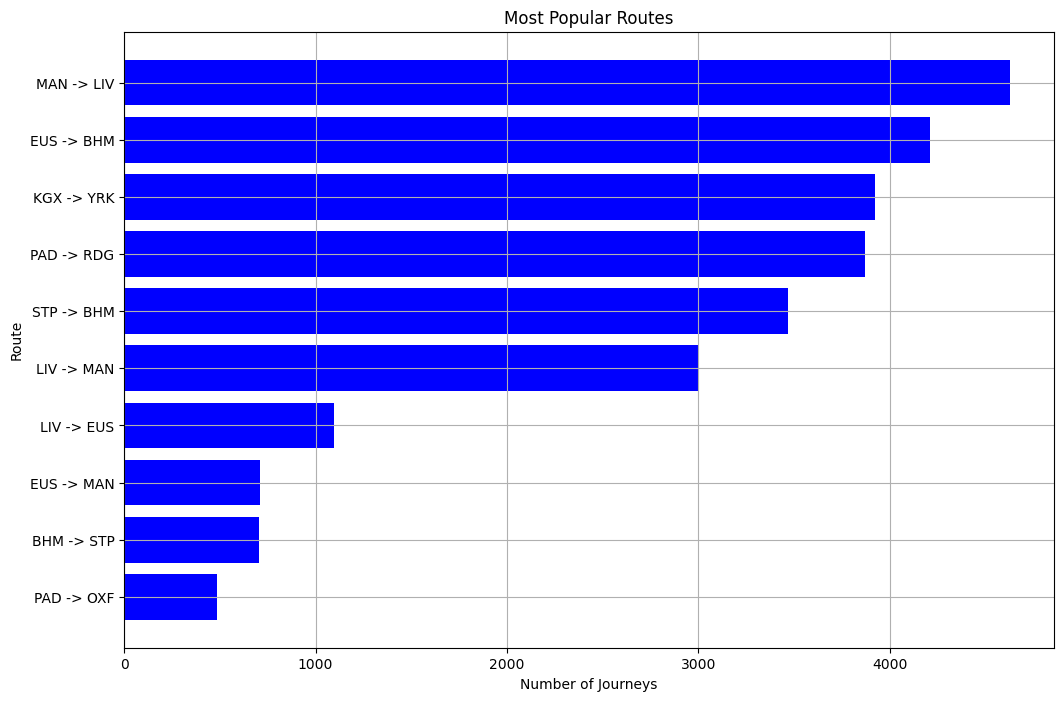

In [8]:
# Group by 'Departure TLC' and 'Arrival TLC' to calculate the count of journeys
popular_routes = df.groupby(['Departure TLC', 'Arrival TLC'])['Transaction ID'].count().reset_index()
popular_routes.columns = ['Departure TLC', 'Arrival TLC', 'Journey Count']
popular_routes = popular_routes.sort_values(by='Journey Count', ascending=False).head(10)

# Plot the most popular routes
plt.figure(figsize=(12, 8))
plt.barh(popular_routes['Departure TLC'] + ' -> ' + popular_routes['Arrival TLC'], popular_routes['Journey Count'], color='blue')
plt.title('Most Popular Routes')
plt.xlabel('Number of Journeys')
plt.ylabel('Route')
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()

### Revenue Analysis of Popular Routes

1. We've discovered that the two most travelled routes (**MAN to LIV** and **EUS to BHM**) are also the lowest revenue generating routes at **2.9%** and **8.6%** respectively.
2. We've also uncovered that two of the least travelled routes combined (**LIV to EUS** and **EUS to MAN**) generate nearly as much revenue as the highest revenue generating route (**KGX to YRK**).

#### Recommendation

Prices for frequented routes should be re-evaluated as they are currently undersold.

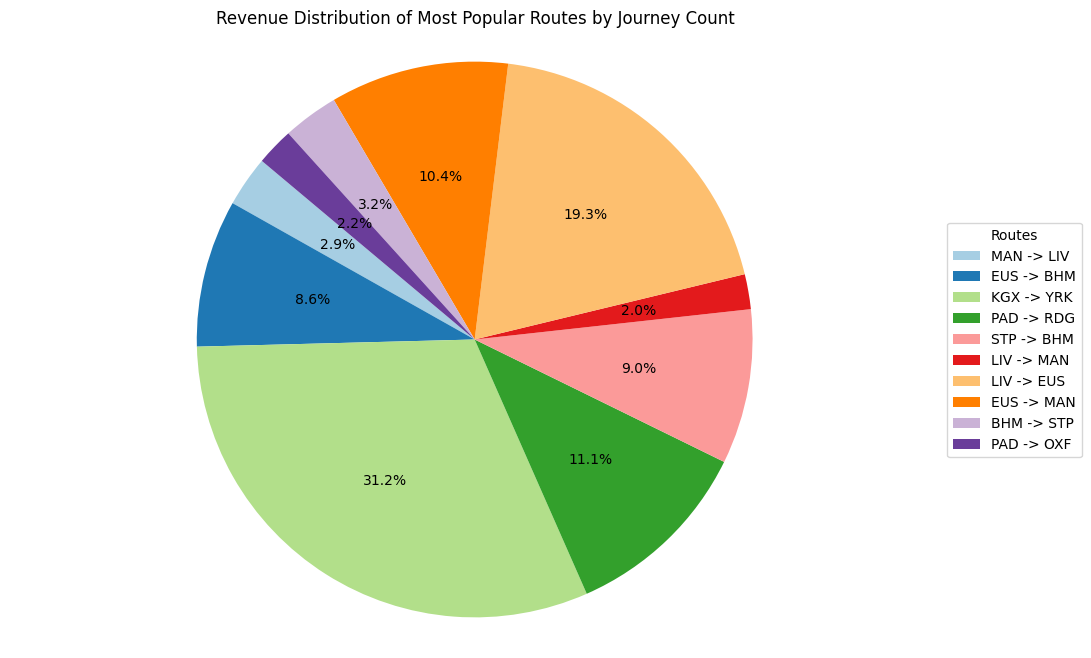

In [46]:
# Group by 'Departure TLC' and 'Arrival TLC' to calculate the count of journeys
popular_routes = df.groupby(['Departure TLC', 'Arrival TLC'])['Transaction ID'].count().reset_index()
popular_routes.columns = ['Departure TLC', 'Arrival TLC', 'Journey Count']
top_routes = popular_routes.sort_values(by='Journey Count', ascending=False).head(10)

# Calculate total revenue for the top 10 routes by journey count
top_routes_revenue = df[df.apply(lambda row: (row['Departure TLC'], row['Arrival TLC']) in top_routes[['Departure TLC', 'Arrival TLC']].values, axis=1)]
top_routes_revenue = top_routes_revenue.groupby(['Departure TLC', 'Arrival TLC'])['Price'].sum().reset_index()
top_routes_revenue.columns = ['Departure TLC', 'Arrival TLC', 'Total Revenue']

# Ensure the routes are consistent with the top 10 most popular routes by journey count
top_routes = top_routes.merge(top_routes_revenue, on=['Departure TLC', 'Arrival TLC'])

# Prepare data for the pie chart
routes = top_routes['Departure TLC'] + ' -> ' + top_routes['Arrival TLC']
revenue = top_routes['Total Revenue']

# Plot a pie chart for the top 10 routes by revenue
plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(revenue, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(routes))))

# Add a legend
plt.legend(wedges, routes, title="Routes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Revenue Distribution of Most Popular Routes by Journey Count')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Performance Analysis of Popular Routes

1. We've discovered that two of the most frequented routes (**MAN to LIV** and **EUS to BHM**) are delayed very frequently, and the average delay time is **55-65min**.
2. We've also uncovered that the most profitable route (**KGX to YRK**) suffers only occassional delays at an average delay time of approx. **15min**

#### Recommendations

It is evident that **MAN to LIV** and **EUS to BHM** have the potential to generate more revenue if the delays could be reduced when comparing this to **KGX to YRK**.

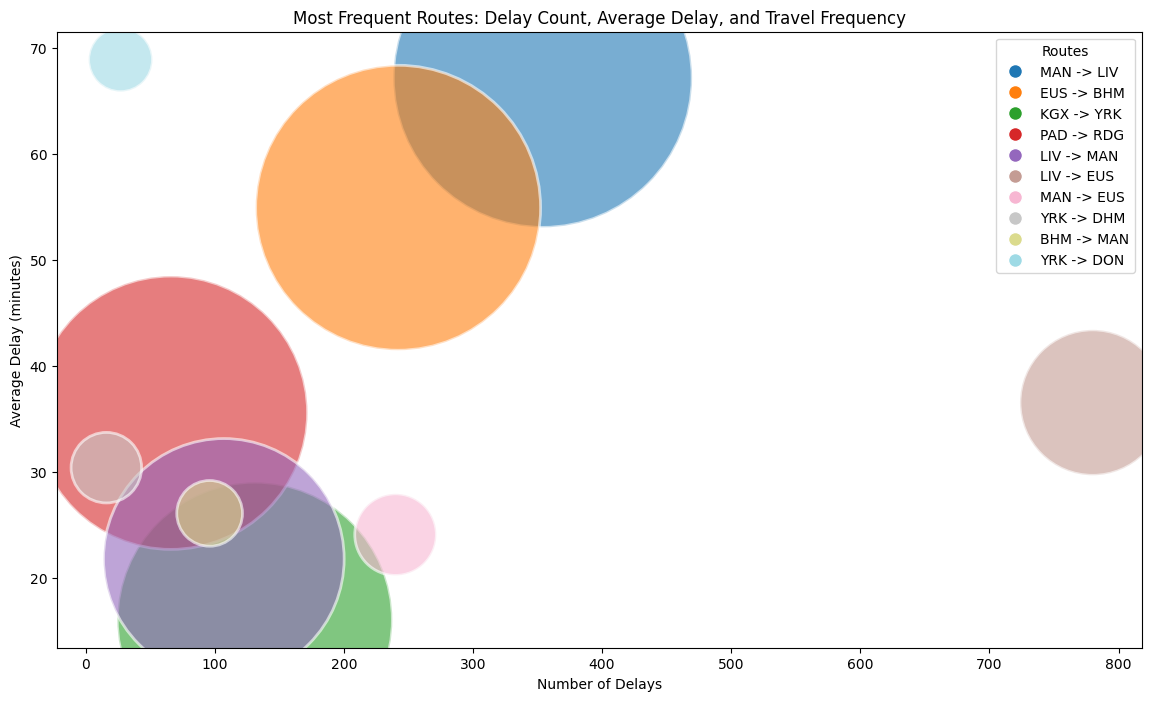

In [34]:
# Convert 'Departure Time', 'Arrival Time', and 'Actual Arrival Time' to datetime objects
df['Departure Time'] = pd.to_datetime(df['Departure Time'], format='%H:%M:%S')
df['Arrival Time'] = pd.to_datetime(df['Arrival Time'], format='%H:%M:%S')
df['Actual Arrival Time'] = pd.to_datetime(df['Actual Arrival Time'], format='%H:%M:%S')

# Calculate the delay amount in minutes
df['Delay Amount'] = (df['Actual Arrival Time'] - df['Arrival Time']).dt.total_seconds() / 60.0

# Filter for delayed journeys
delayed_journeys = df[df['Journey Status'] == 'Delayed']

# Group by 'Departure TLC' and 'Arrival TLC' to calculate the count of delays, the average delay amount, and the number of journeys
delay_stats = delayed_journeys.groupby(['Departure TLC', 'Arrival TLC']).agg(
    delay_count=('Transaction ID', 'count'),
    average_delay=('Delay Amount', 'mean')
).reset_index()

# Calculate the number of journeys for each route
total_journeys = df.groupby(['Departure TLC', 'Arrival TLC'])['Transaction ID'].count().reset_index()
total_journeys.columns = ['Departure TLC', 'Arrival TLC', 'journey_count']

# Merge delay statistics with journey counts
merged_stats = pd.merge(delay_stats, total_journeys, on=['Departure TLC', 'Arrival TLC'])

# Sort by the number of journeys and get the top 10 routes
top_journey_routes = merged_stats.sort_values(by='journey_count', ascending=False).head(10)

# Prepare data for the bubble chart
routes = top_journey_routes['Departure TLC'] + ' -> ' + top_journey_routes['Arrival TLC']
delay_counts = top_journey_routes['delay_count']
average_delays = top_journey_routes['average_delay']
journey_counts = top_journey_routes['journey_count']

# Normalize bubble sizes for better visualization
bubble_size = journey_counts * 10

# Generate a unique color for each route
colors = cm.tab20(np.linspace(0, 1, len(routes)))

# Plot the bubble chart
plt.figure(figsize=(14, 8))
sc = plt.scatter(delay_counts, average_delays, s=bubble_size, alpha=0.6, edgecolors="w", linewidth=2, color=colors)
plt.xlabel('Number of Delays')
plt.ylabel('Average Delay (minutes)')
plt.title('Most Frequent Routes: Delay Count, Average Delay, and Travel Frequency')

# Create a legend for the routes
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=route,
                              markersize=10, markerfacecolor=color) for route, color in zip(routes, colors)]
plt.legend(handles=legend_elements, loc='upper right', title='Routes')

# Show the plot
plt.show()

### Peak Travel Analysis of Popular Routes

1. The most frequented routes (**MAN to LIV** and **EUS to BHM**) have heavy morning traffic
2. The most revenue generating route **KGX to YRK** is experiencing equal high traffic during morning and evening.
3. The 2nd most revenue generating route **LIV to EUS** is experiencing extremely heavy evening traffic.

#### Recommendations

Alleviating morning and evening traffic for the above routes by making available backup trains in case of breakdowns is going generate additional revenue and reduce refunds/cancellations.

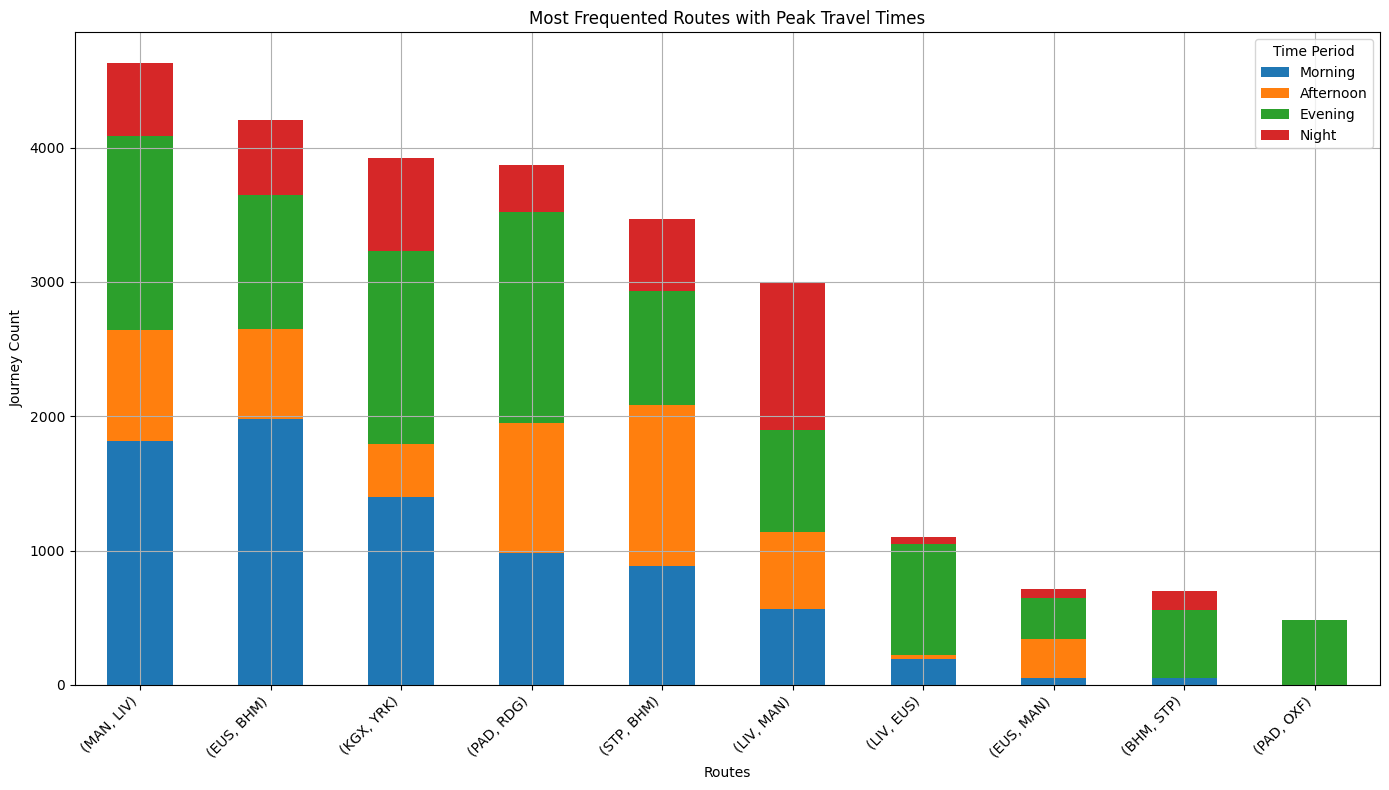

In [65]:
# Assuming you already have a DataFrame df with columns 'Departure TLC' and 'Departure Time'
# Convert 'Departure Time' to datetime object if it's not already
df['Departure Time'] = pd.to_datetime(df['Departure Time'])

# Define time period categories: Morning, Afternoon, Evening, Night
morning = range(6, 12)
afternoon = range(12, 18)
evening = range(18, 24)
night = range(0, 6)

# Categorize departure times into time periods
def categorize_time_period(hour):
    if hour in morning:
        return 'Morning'
    elif hour in afternoon:
        return 'Afternoon'
    elif hour in evening:
        return 'Evening'
    else:
        return 'Night'

df['Time Period'] = df['Departure Time'].dt.hour.apply(categorize_time_period)

# Calculate journey count for each time period and route
peak_times = df.groupby(['Departure TLC', 'Arrival TLC', 'Time Period']).size().reset_index(name='Journey Count')

# Get top 10 popular routes and order them by total journey count
top_10_routes = peak_times.groupby(['Departure TLC', 'Arrival TLC'])['Journey Count'].sum().nlargest(10).index
peak_times_top_10 = peak_times[peak_times[['Departure TLC', 'Arrival TLC']].apply(tuple, axis=1).isin(top_10_routes)]

# Pivot the DataFrame to have time periods as columns
peak_times_pivot = peak_times_top_10.pivot_table(index=['Departure TLC', 'Arrival TLC'], columns='Time Period', values='Journey Count', aggfunc='sum').fillna(0)

# Sort the routes by total journey count
sorted_routes = peak_times_pivot.sum(axis=1).sort_values(ascending=False).index
peak_times_pivot = peak_times_pivot.loc[sorted_routes]

# Plot the stacked bar chart
peak_times_pivot.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Most Frequented Routes with Peak Travel Times')
plt.xlabel('Routes')
plt.ylabel('Journey Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Time Period', loc='upper right', labels=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.grid(True)
plt.tight_layout()
plt.show()

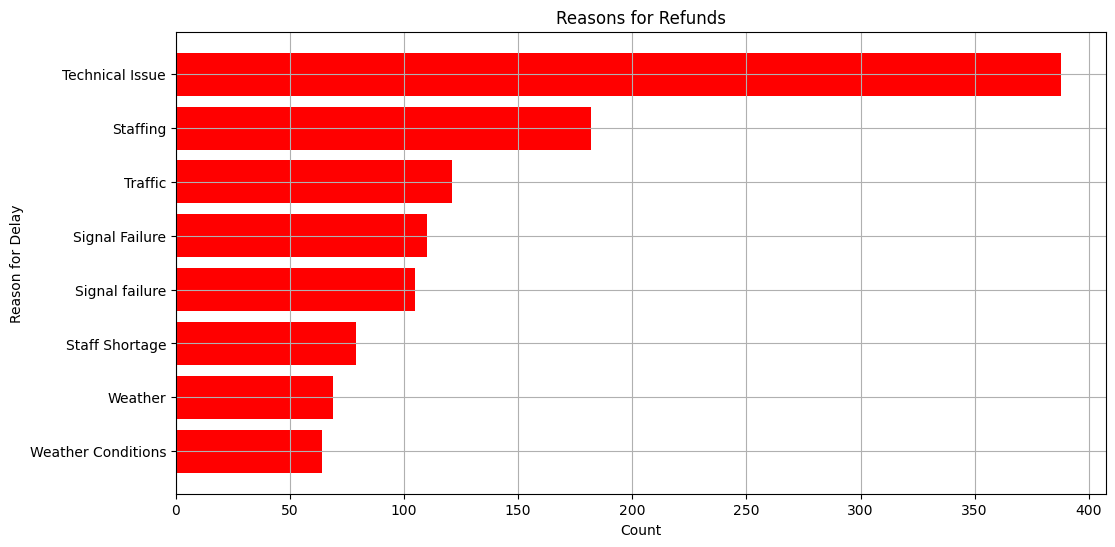

In [12]:
# Group by 'Reason for Delay' and calculate the count of refund requests
reasons_for_refund = refund_requests['Reason for Delay'].value_counts().reset_index()
reasons_for_refund.columns = ['Count', 'Reason for Delay']

# Plot reasons for refunds
plt.figure(figsize=(12, 6))
plt.barh(reasons_for_refund['Count'], reasons_for_refund['Reason for Delay'], color='red')
plt.title('Reasons for Refunds')
plt.ylabel('Reason for Delay')
plt.xlabel('Count')
plt.grid(True)
# plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.show()